In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [24]:
data = pd.read_csv('daily_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]
numerical_data = data[data.columns[data.columns != 'unique_dates']]
data.set_index(['unique_dates'])
data.head(5)

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743


In [25]:
numerical_data.describe()

,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2823.009615,1381.745192,6.781196,130.134409,181.683854,4.751818,4.942377,13.319047,1.523801,50.648546,565.086575,724.293666,21.343297,25.387624,76.982303,6.767507
std,1105.981528,486.888045,0.291909,10.163078,12.462699,0.417947,0.543098,0.769308,0.087894,7.259918,66.296144,55.717403,3.391624,4.556814,11.064264,0.800476
min,17.000000,15.000000,6.245841,103.679487,127.396694,3.925926,2.794872,10.801282,1.345013,43.453844,491.709278,640.293194,18.529412,22.262578,68.661504,5.659091
25%,2162.000000,1107.750000,6.653459,122.723817,172.754553,4.595588,4.615498,12.815120,1.481809,47.045039,523.869717,686.905871,19.946431,23.439186,71.187718,6.286906
50%,2911.000000,1440.000000,6.738386,128.088385,180.628239,4.713085,4.803605,13.175496,1.519664,48.973714,548.922023,711.371892,20.755914,24.230372,74.243684,6.645879
75%,3659.250000,1707.500000,6.863871,136.329867,188.948178,4.837516,5.263893,13.779480,1.542557,52.138481,585.736499,750.226245,21.902209,25.998524,78.903082,7.144929
max,4531.000000,2128.000000,9.927290,199.154111,250.253333,9.610866,9.126229,18.025658,2.274081,119.001695,1032.202398,1097.682515,57.772016,61.545134,179.788701,11.675184


In [7]:
def boxplots(numerical_data):
    fig, axes = plt.subplots(8, 2, figsize=(20, 30))
    i = 0
    j = 0
    for feature in numerical_data.columns.values:
        sns.boxplot(ax=axes[i, j], x=numerical_data[feature])
        if j == 1:
            j = 0
            i += 1
        else:
            j += 1

In [33]:
def get_right(data, column):
    return boxplot_stats(data[column]).pop(0)['fliers'].min()

In [35]:
from matplotlib.cbook import boxplot_stats  
dic_less = {'unique_meals' : 250, 'Protein_average_sum' : 6.5, 'Sodium_average_sum' : 158, 'Fat_average_sum'
           :4, 'Carbs_average_sum' : 11.5,'Fiber_average_sum':1.4,  }
dic_more = {'Protein_average_sum' : 7.25, 'Calories_average_sum' : 158, 'Sodium_average_sum' : 218, 
           'Sugar_average_sum' : 5.3, 'Fat_average_sum' : 6, 'Carbs_average_sum' : 15, 'Fiber_average_sum':
           1.65, 'Protein_average_dif' : 60, 
            'Calories_average_dif' : get_right(data, 'Calories_average_dif'), 
            'Sodium_average_dif' : get_right(data, 'Sodium_average_dif'), 
            'Sugar_average_dif' : get_right(data, 'Sugar_average_dif'), 'Fat_average_dif' : get_right(data, 'Fat_average_dif'),
            'Carbs_average_dif' : get_right(data, 'Carbs_average_dif'), 'Fiber_average_dif' : get_right(data, 'Fiber_average_dif')
           }

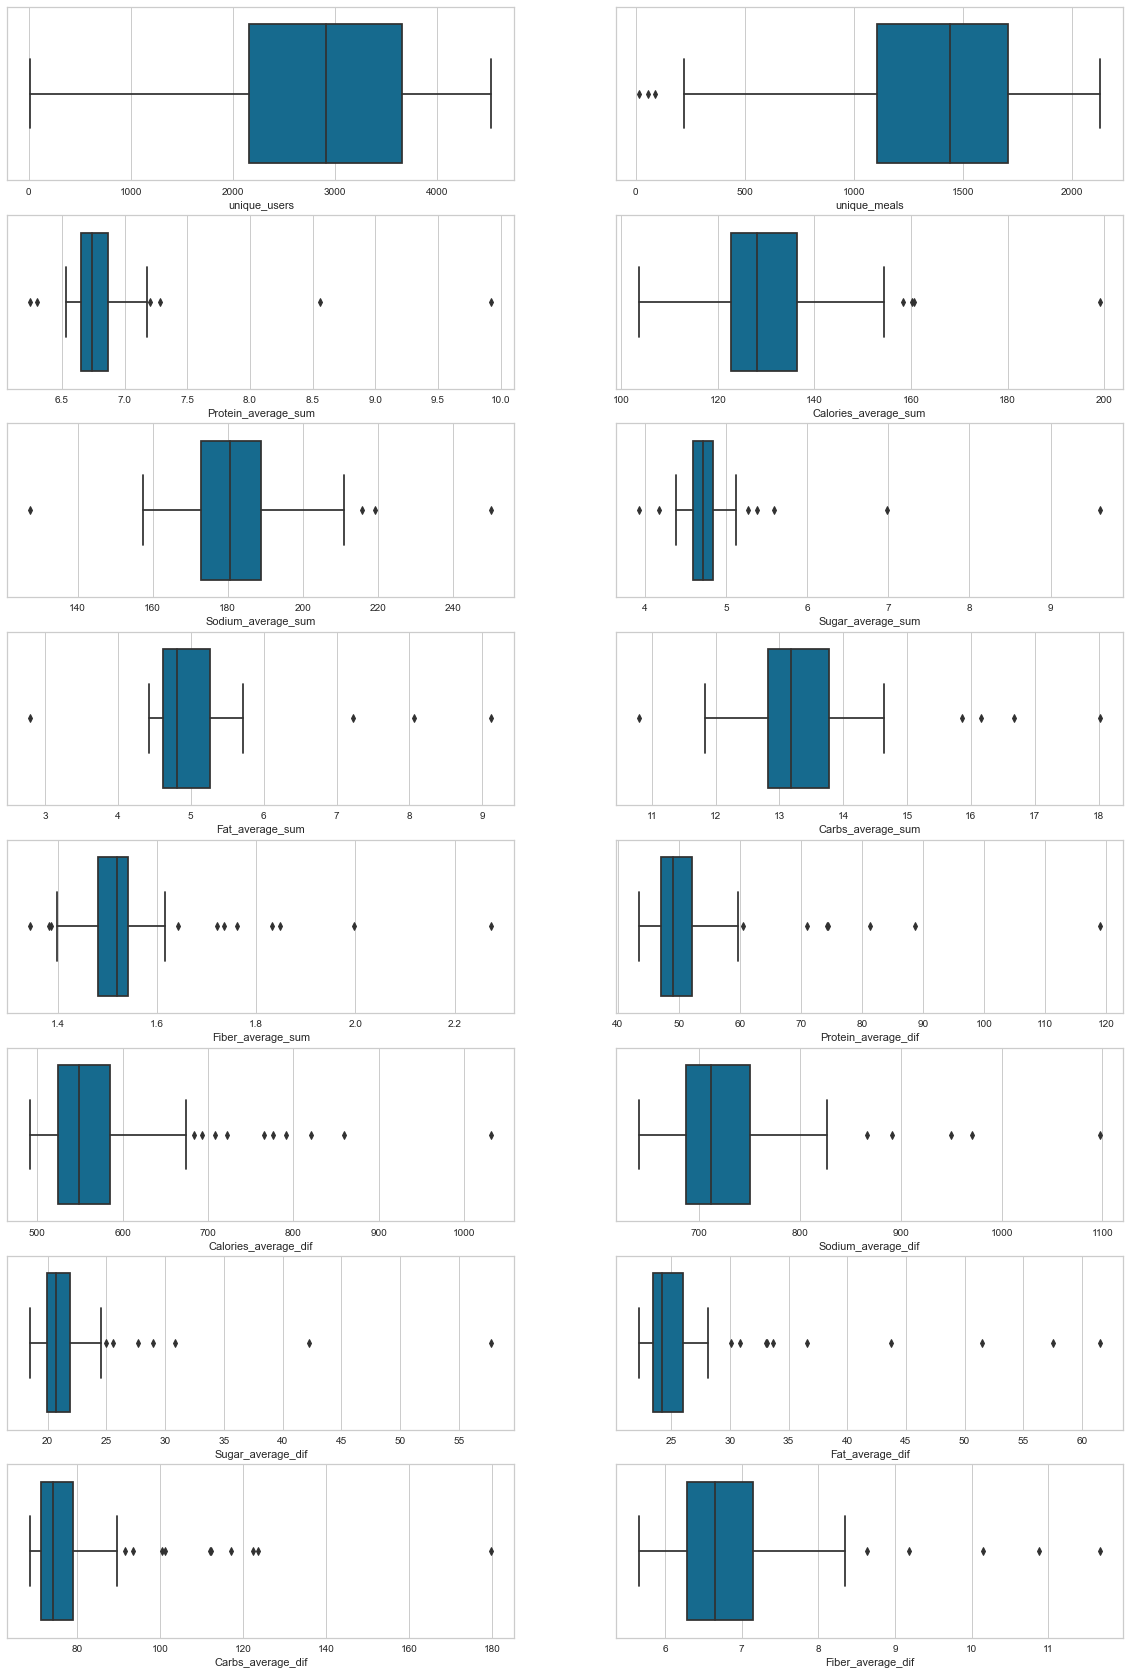

In [26]:
boxplots(numerical_data)

In [38]:
for column in numerical_data.columns.values:
    df = numerical_data.loc[:, [column]]
    if column in dic_more:
        for i in df.index:
            if df.iloc[i, 0] >= dic_more[column]:
                numerical_data.loc[i, [column]] = numerical_data[column].median()
    if column in dic_less:
        for i in df.index:
            if df.iloc[i, 0] <= dic_less[column]:
                numerical_data.loc[i, [column]] = numerical_data[column].median()

In [39]:
numerical_data /= numerical_data.max()

In [40]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
hopkins(numerical_data)

0.8284196226871062

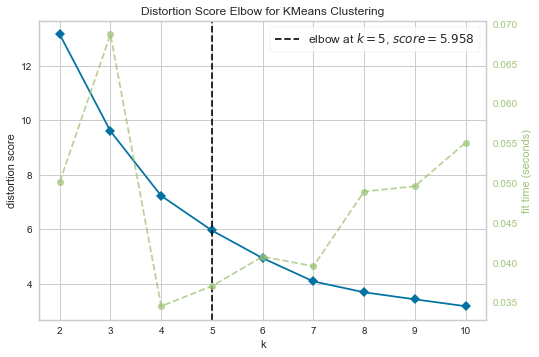

In [42]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(numerical_data)
visualizer.show()

In [43]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(numerical_data)

clusters = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

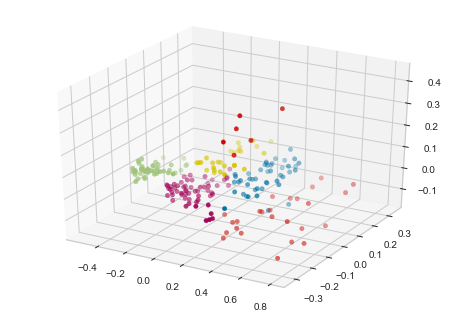

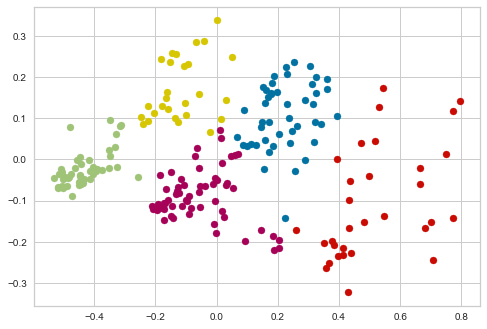

In [44]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(numerical_data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(numerical_data))
plot(np.asarray(pca_components), clusters, 2)

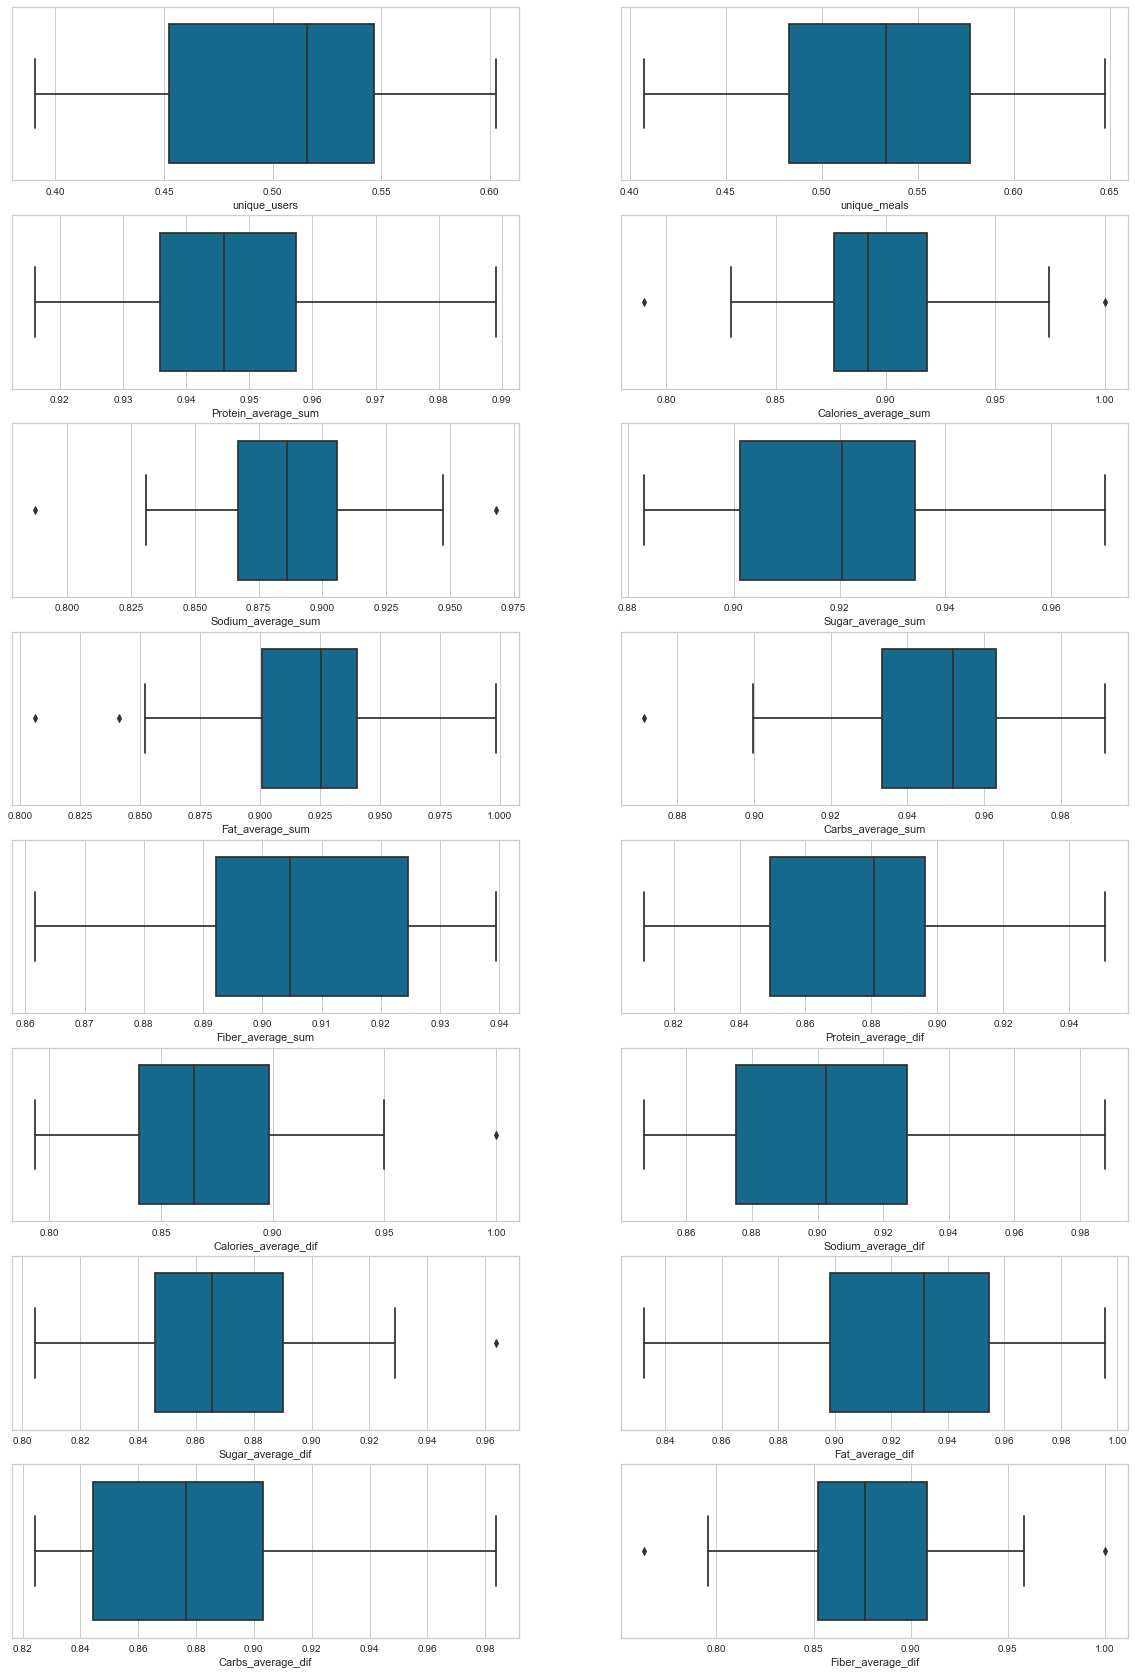

In [45]:
boxplots(numerical_data.loc[clusters[0], :])

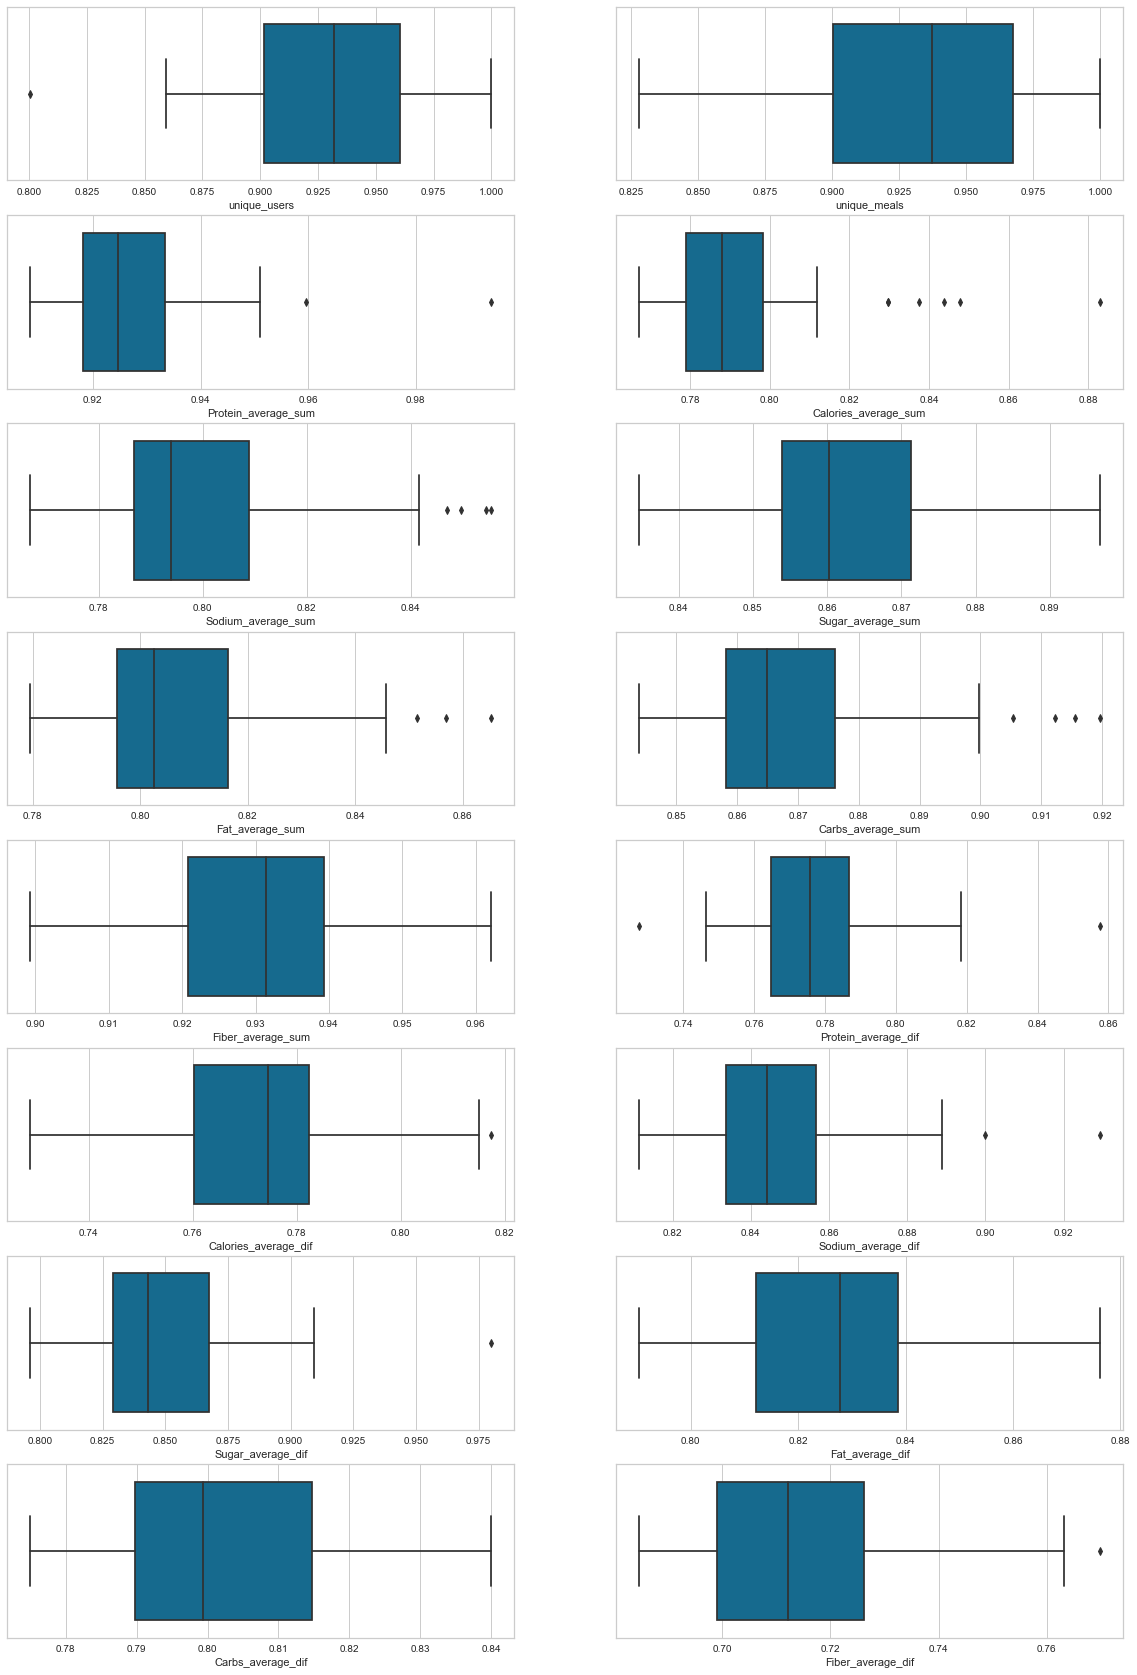

In [46]:
boxplots(numerical_data.loc[clusters[1], :])

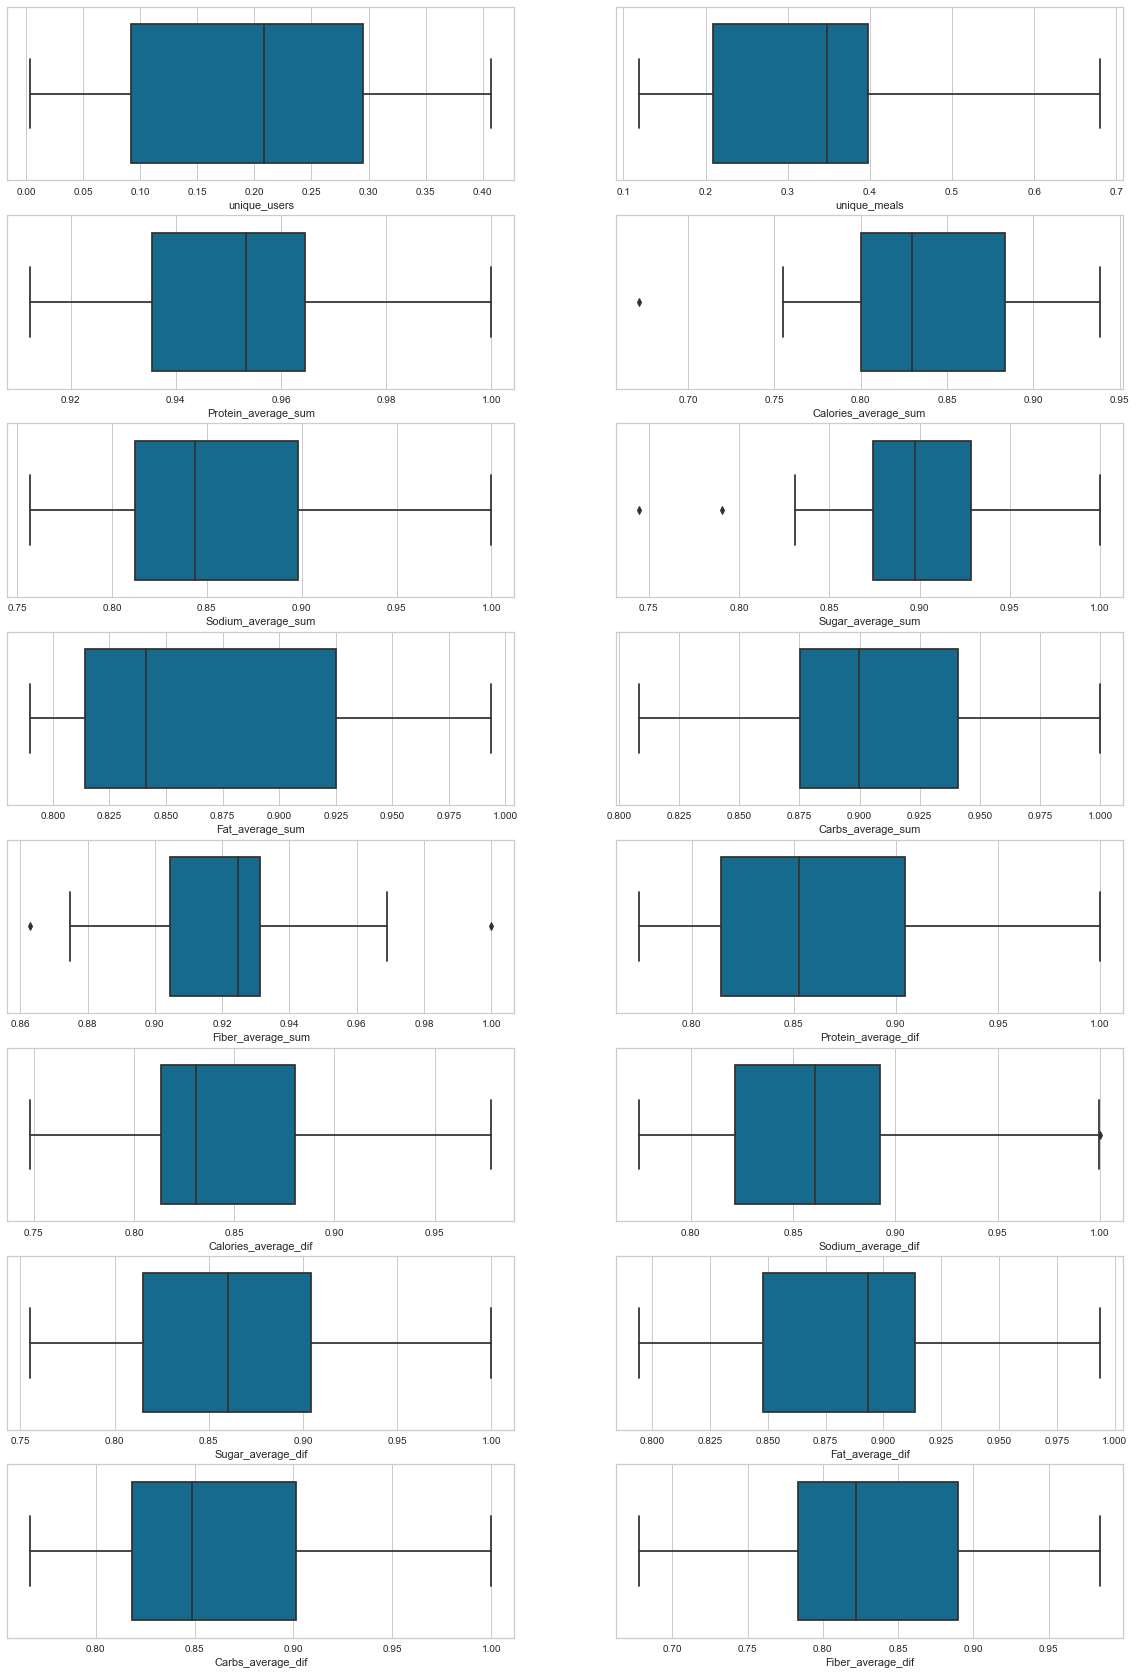

In [47]:
boxplots(numerical_data.loc[clusters[2], :])

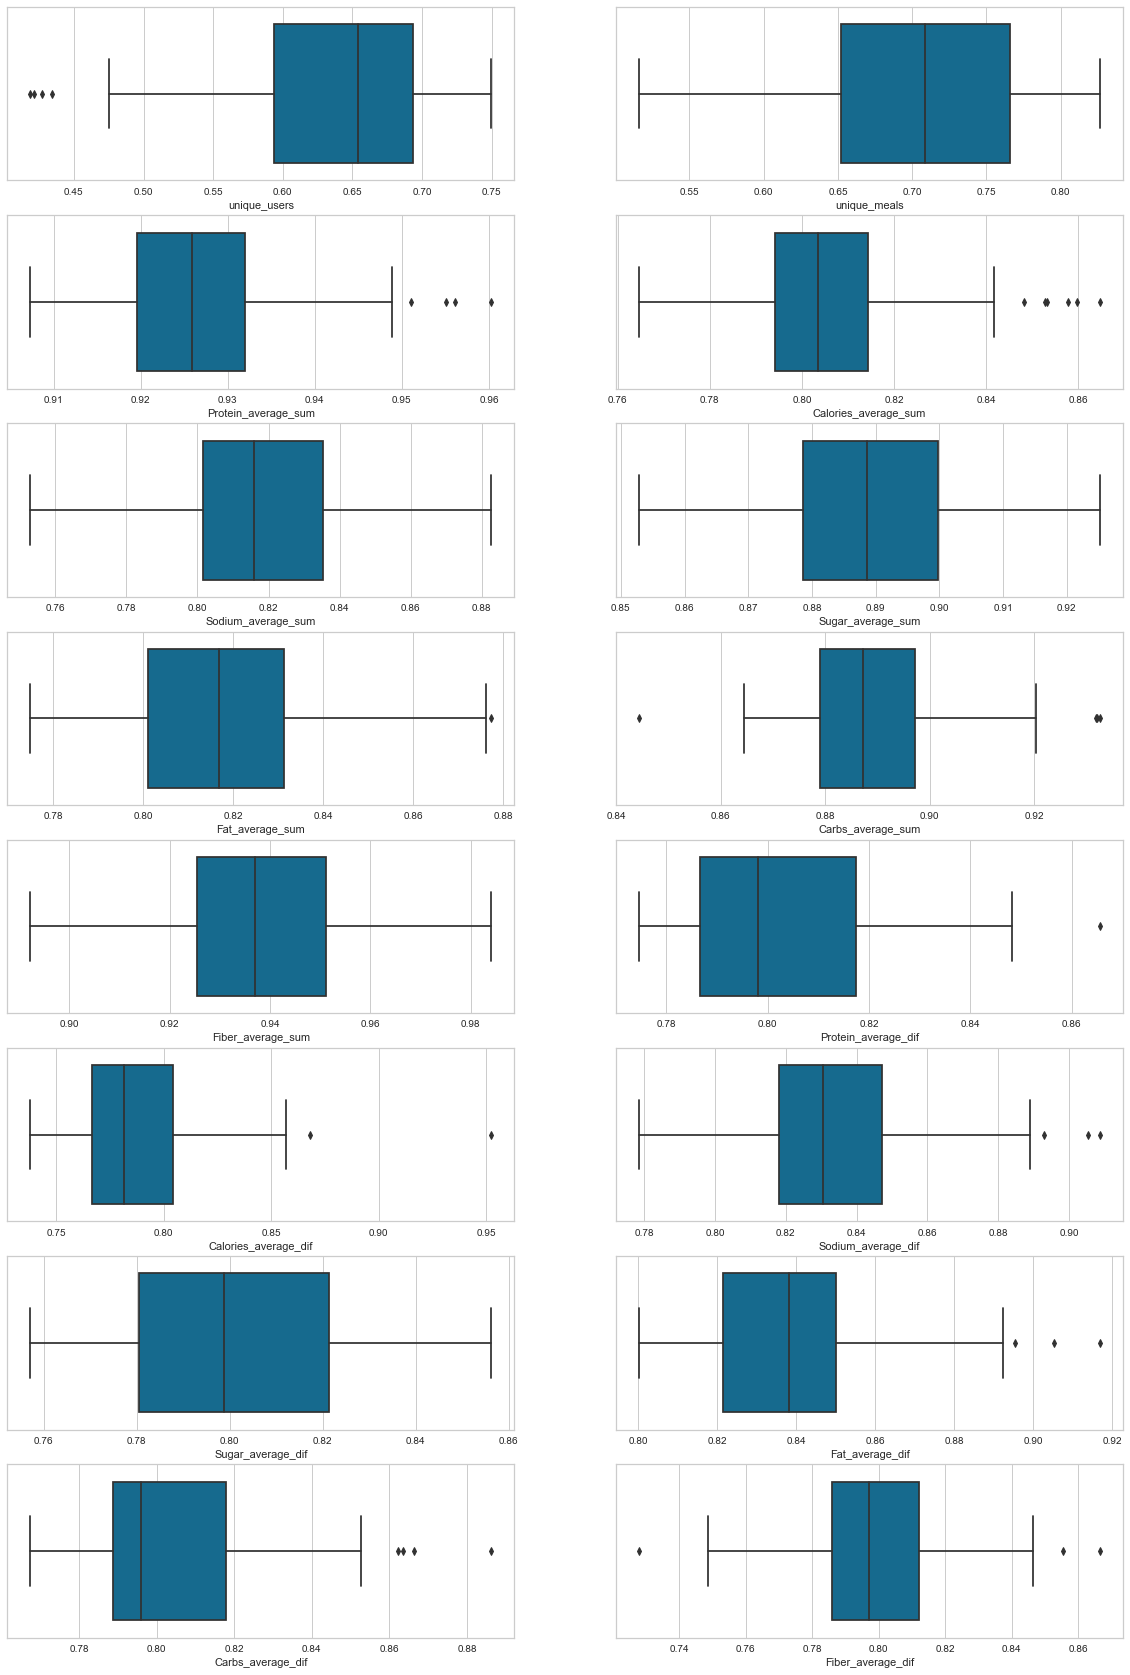

In [48]:
boxplots(numerical_data.loc[clusters[3], :])